In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('kaggle/input/Dataset_2/LIMFADD.csv')

In [3]:
df.head()

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
0,2,2757,1378.5,0,0,N,N,N,0,N,Bot
1,2,505,252.5,0,0,N,Yes,N,0,N,Scam
2,6786,1782,0.262599469,1589,6051.040404,yes,N,Yes,10,N,Real
3,21,1281,61,0,0,N,Yes,N,0,N,Bot
4,585,1682,2.875213675,2663,926.1920333,yes,N,N,12,Yes,Real


In [4]:
df.shape

(15000, 11)

In [5]:
df.isnull().sum()

Followers              0
Following              0
Following/Followers    0
Posts                  0
Posts/Followers        0
Bio                    0
Profile Picture        0
External Link          0
Mutual Friends         0
Threads                0
Labels                 0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(59)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Followers            15000 non-null  int64 
 1   Following            15000 non-null  int64 
 2   Following/Followers  15000 non-null  object
 3   Posts                15000 non-null  int64 
 4   Posts/Followers      15000 non-null  object
 5   Bio                  15000 non-null  object
 6   Profile Picture      15000 non-null  object
 7   External Link        15000 non-null  object
 8   Mutual Friends       15000 non-null  int64 
 9   Threads              15000 non-null  object
 10  Labels               15000 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB


In [8]:
df.describe()

,Followers,Following,Posts,Mutual Friends
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,23397.378933,1385.350000,427.830200,3.011733
std,41920.419061,1600.823163,678.889037,4.203313
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,369.000000,1.000000,0.000000
50%,48.000000,725.500000,4.000000,0.000000
75%,19535.250000,1747.000000,578.250000,6.000000
max,163000.000000,6692.000000,2669.000000,15.000000


# EDA

In [9]:
df['Labels'].value_counts()

Labels
Bot     3750
Scam    3750
Real    3750
Spam    3750
Name: count, dtype: int64

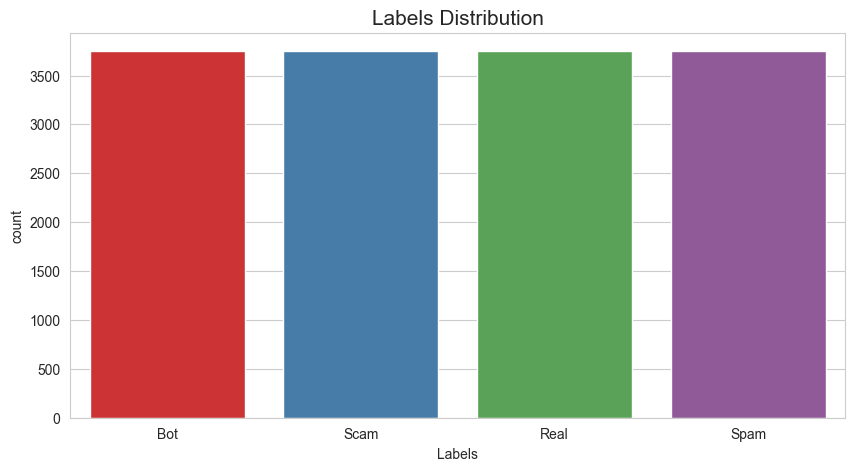

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x=df['Labels'], palette='Set1')
plt.title('Labels Distribution', fontsize=15)
plt.show()

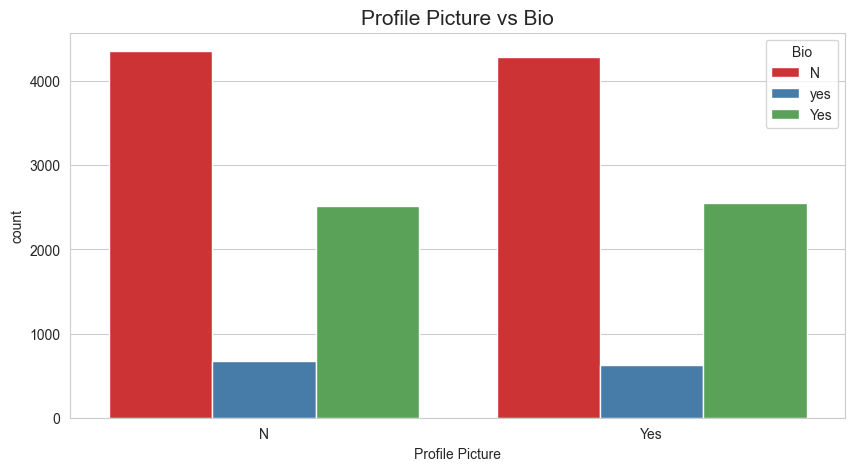

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Profile Picture'], palette='Set1',hue=df['Bio'])
plt.title('Profile Picture vs Bio', fontsize=15)
plt.show()

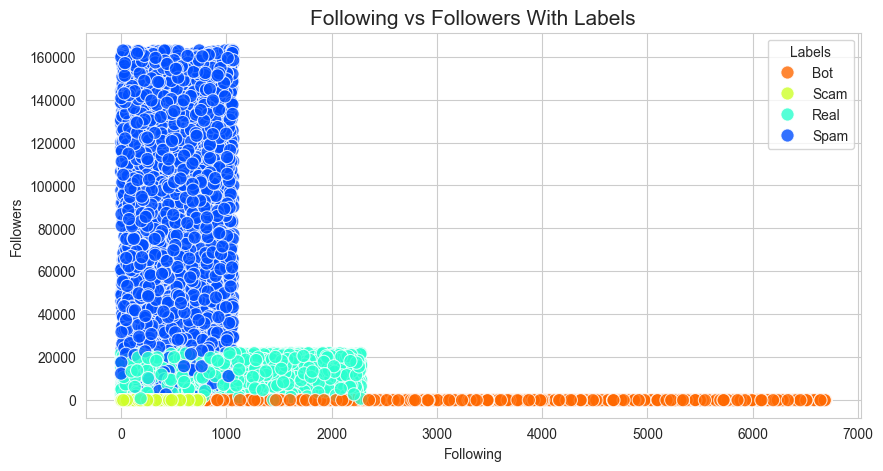

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Following'], y=df['Followers'], hue=df['Labels'], palette='jet_r', alpha=0.8, s=90)
plt.title('Following vs Followers With Labels', fontsize=15)
plt.show()

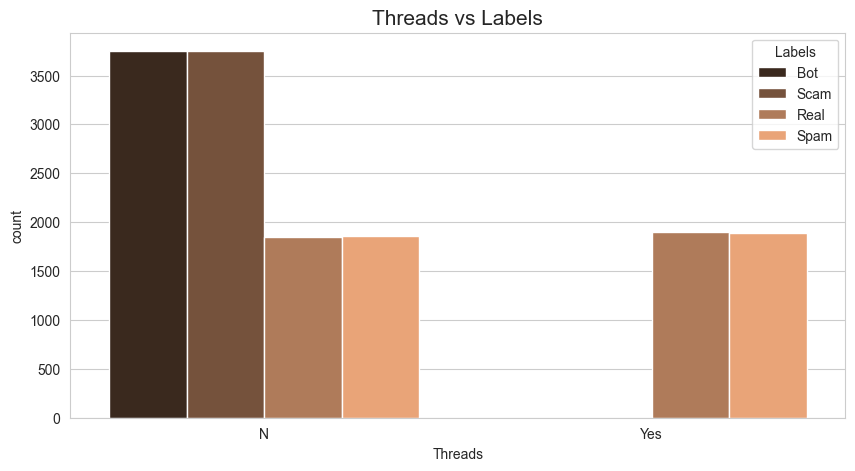

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Threads'], palette='copper',hue=df['Labels'])
plt.title('Threads vs Labels', fontsize=15)
plt.show()

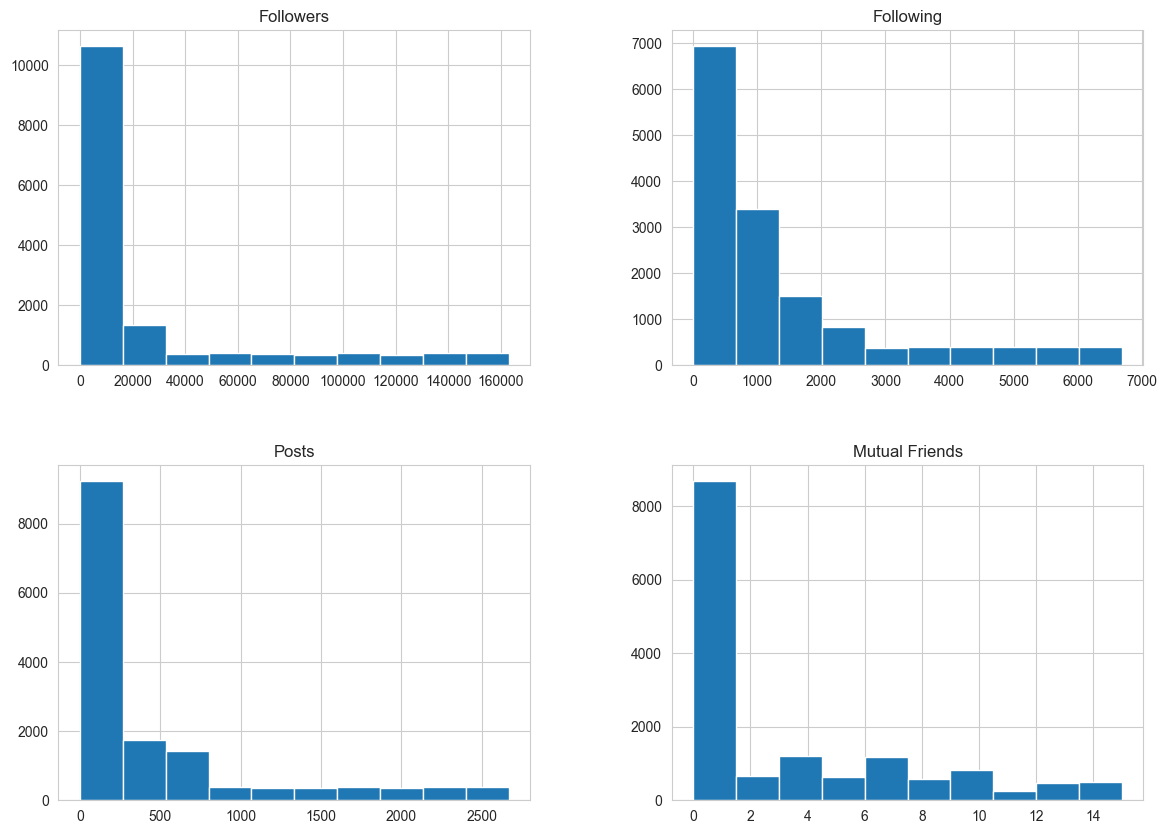

In [14]:
df.hist(figsize=(14,10))
plt.show()


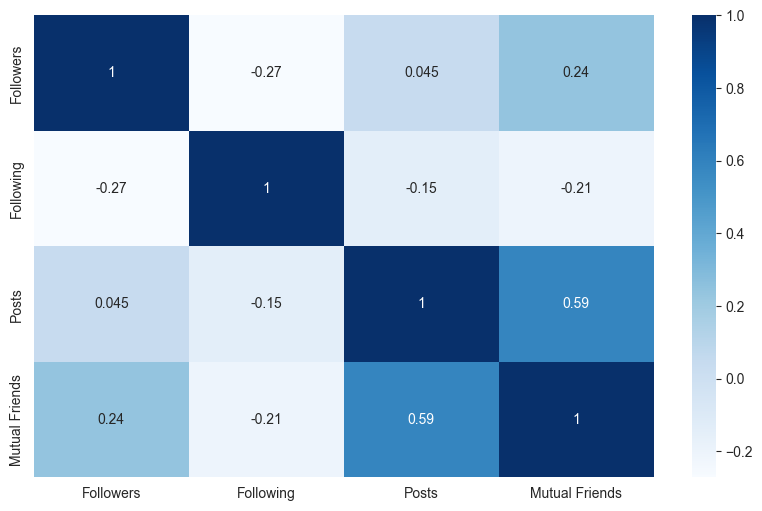

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

In [16]:
df.columns

Index(['Followers', 'Following', 'Following/Followers', 'Posts',
       'Posts/Followers', 'Bio', 'Profile Picture', 'External Link',
       'Mutual Friends', 'Threads', 'Labels'],
      dtype='object')

In [17]:
df.drop(['Following/Followers', 'Posts/Followers'], axis=1, inplace=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score

# Label Encoding

In [19]:
le = LabelEncoder()
for k in ['Bio', 'Profile Picture',
       'External Link', 'Threads', 'Labels']:
    df[k] = le.fit_transform(df[k])

In [20]:
X = df.drop('Labels', axis=1)
y = df['Labels']

X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.3)
print(f"X_train Shape: {X_train.shape}")
print(f"Y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (10500, 8)
Y_train Shape: (10500,)
X_test Shape: (4500, 8)
y_test Shape: (4500,)


# Models Building

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

In [22]:
end = []
for names, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)*100
    prec = precision_score(y_test, preds, average='macro')
    recal = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds,  average='macro')
    
    
    
    print(f"\nName: {names}")
    print(f"Accuracy: {acc:.2f}")   
    print(f"Precision Score: {prec}")
    
    end.append({
        'Models': names,
        'Test Accuracy': acc,
        'Test Precision': prec,
        'Test Recall Score': recal,
        'Test F1 Score': f1
        
    })
    summary_df = pd.DataFrame(end)

# Show all model evaluation metrics in one table
print("\n 📊 Summary:")
summary_df   


Name: Logistic Regression
Accuracy: 88.18
Precision Score: 0.8962178536804398

Name: Random Forest
Accuracy: 98.02
Precision Score: 0.9807062296963355

Name: Gradient Boosting
Accuracy: 98.24
Precision Score: 0.9831695121398344

Name: SVM
Accuracy: 89.20
Precision Score: 0.9073672532421825

Name: K-Nearest Neighbors
Accuracy: 95.67
Precision Score: 0.9571522614674252

Name: Naive Bayes
Accuracy: 96.58
Precision Score: 0.9662282065583441

Name: Decision Tree
Accuracy: 97.09
Precision Score: 0.97072345332791

 📊 Summary:


,Models,Test Accuracy,Test Precision,Test Recall Score,Test F1 Score
0,Logistic Regression,88.177778,0.896218,0.885661,0.880019
1,Random Forest,98.022222,0.980706,0.979910,0.980200
2,Gradient Boosting,98.244444,0.983170,0.982009,0.982423
3,SVM,89.200000,0.907367,0.890442,0.891289
4,K-Nearest Neighbors,95.666667,0.957152,0.956774,0.956678
5,Naive Bayes,96.577778,0.966228,0.965592,0.965788
6,Decision Tree,97.088889,0.970723,0.971079,0.970869


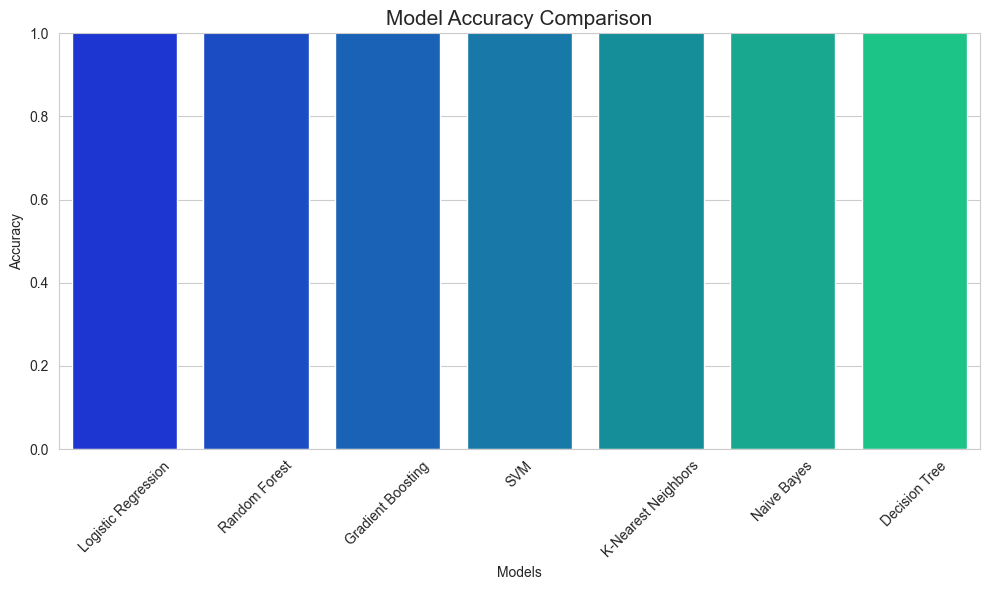

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='Models', y='Test Accuracy', palette='winter')
plt.title("Model Accuracy Comparison", fontsize=15)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()